




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Review](#0)<br>
2.  [Matplotlib Primer](#2)<br>
3.  Exercises in-class
4.  [Review](#12)<br>     
</div>
<hr>

# Plotting and Visualization

Import necessary libraries|use pandas and numpy for support

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


%matplotlib notebook

## A Brief matplotlib API Primer

Create a graph with numpy and matplotlib: arange over 10 values, .plot()

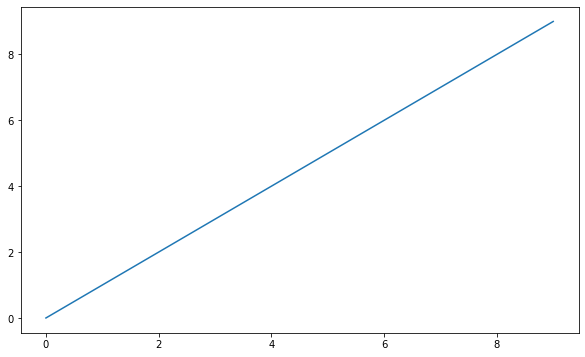

In [ ]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

In [ ]:
fig = plt.figure()
#creates the frame 

<Figure size 432x288 with 0 Axes>

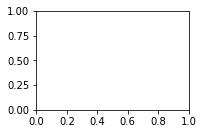

In [ ]:
ax1 = fig.add_subplot(2,2,1)
#divide your frame into subplots, specify the spot in the frame: defaults to 1,1,1
fig

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


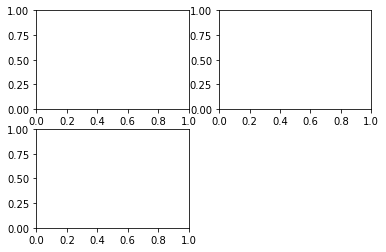

In [ ]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
fig

Plot a cumulative sum graph using numpy's random integer function: cumsum() take the cumulative sum of a numpy array along a given axis (pass in a 1-D array)

In [ ]:
print(np.random.randn(50), np.random.randn(50).cumsum())

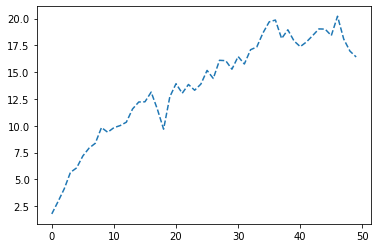

In [ ]:
plt.plot(np.random.randn(50).cumsum(), '--')

Plotting a histogram using the Matplotlib hist() function.
A histogram shows the change in values over categories of a data series. In the method, we specify the array to plot, how spaced out we want the data to be (bins), the color.  

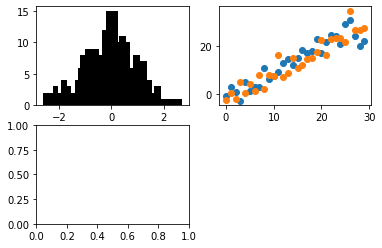

In [ ]:
ax1.hist(np.random.randn(100), bins=20, color='k')
fig

Scatter plots take two arguments: the x and y arrays, and groups the 1st argument on the x axis and the second on the y. 

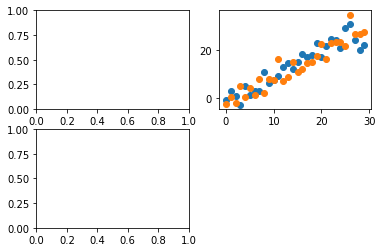

In [ ]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

Plt.Close() closes all or some existing plots/subplots in use. 

In [ ]:
plt.close('all')

We can also specify subplots more readily by specifying the shape of our subplots as a tuple:

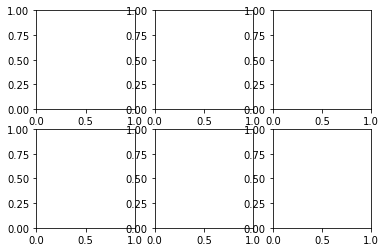

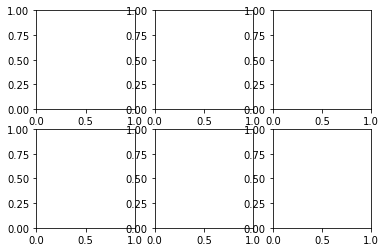

In [ ]:
plt.close()
fig2, axes = plt.subplots(2, 3)
fig2

#### Adjusting the spacing around subplots

You can join and merge your subplots for added coherence. For example, sharing y-axes and x-axes and eliminating spaces between them so that they join in a nice grid. 

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

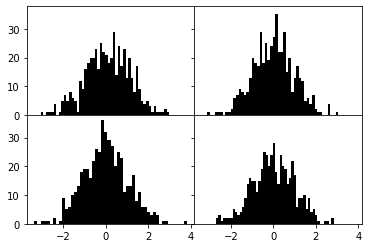

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k')
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

ax.plot(x, y, 'g--'): color and style combined

ax.plot(x, y, linestyle='--', color='g'): color and style as separate arguments

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

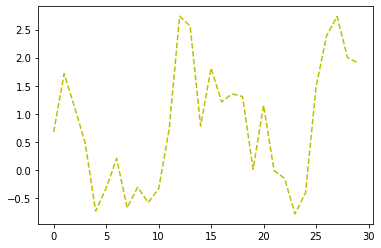

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'y--')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
plt.close('all')

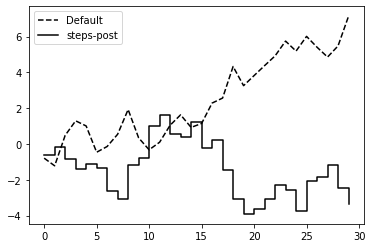

In [ ]:
data = np.random.randn(30).cumsum()
data2 = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data2, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend()

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

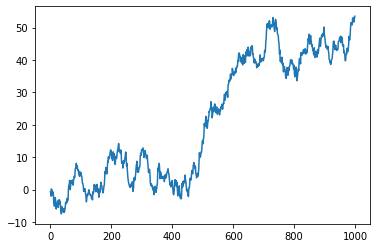

In [ ]:
fig = plt.figure() #the frame
ax = fig.add_subplot(1, 1, 1) #the subplot position in frame
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

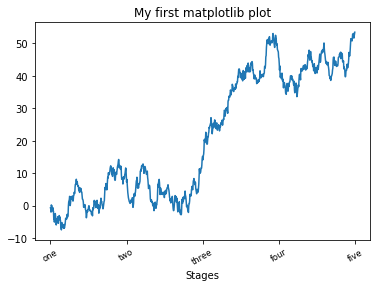

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

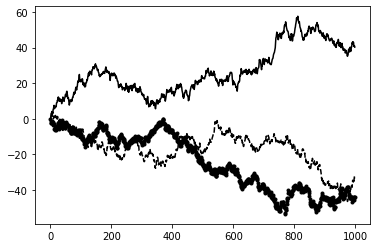

In [ ]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

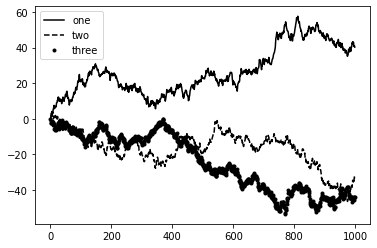

In [ ]:
ax.legend(loc='best')
fig

### Annotations and Drawing on a Subplot

Let's play around with a real dataset - let's 

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']


In [ ]:
spx.plot(ax=ax, style='k-')

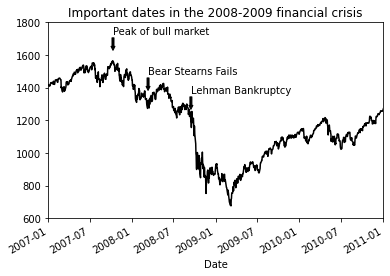

In [ ]:
#import annotations
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
#use .annotate() over the annotations -> label = what to annotate, xy = where to put the arrow,
#xytext = where to put the text, arrowprops = handles arrow size and color, horizonal and vertical alignment to arrange
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')
fig

Plot shapes using plt.Shapes! <br>
1) Initialize figure (frame) and frame size, add subplot <br>
2) Plot using plt.Shape <br>
3) Use add_patch(Shape) to realize 

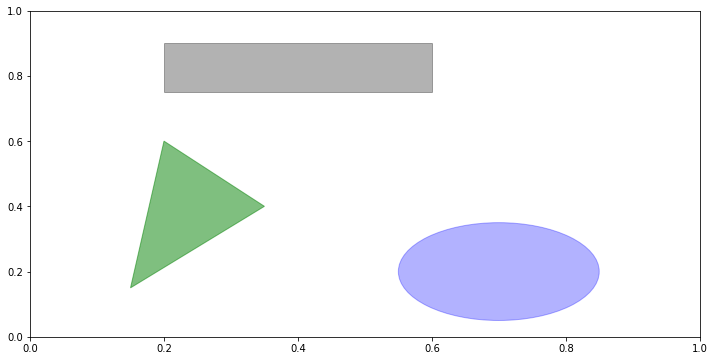

In [ ]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## Plotting with pandas and seaborn

### Line Plots

Simply the plot() function on a series or dataframe:

In [ ]:
plt.close('all')

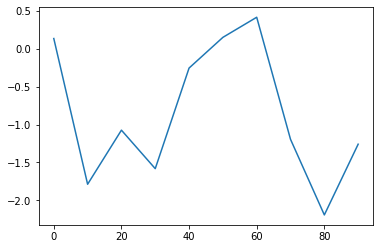

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

Plot.bar(axes, color, alpha) - alpha is grayscale, for styling. Works on Series:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Or Dataframes, equally:

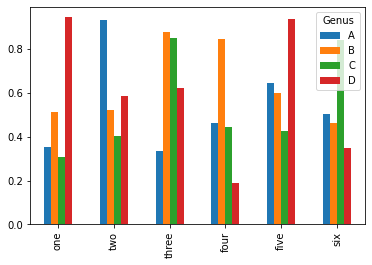

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

Say we want to stack all the bars, specify stacked = True in plot.barh() - barh is for horizontal stacking - this is typically better for viewing purposes.

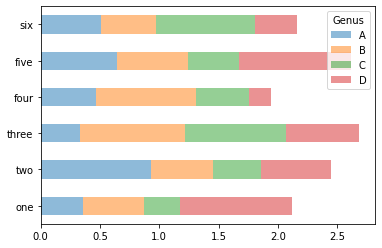

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

<h2> Exercise: Visualize Tips.CSV </h2> 
Boiler plate code for reading in CSV, and getting just the party counts by day. <br>
1) Turn the party size counts into percentages, such that they sum to 1 for each day. Remember it's x/(sum(X)) *100 for % of total. Plot the percentages for only parties of 2-5 people in a bar graph of your choice. <br>
2) Calculate the individual tips as a percentage of each total bill from the tips table. Plot the percentages using a standard line grap (simplest possible graph!)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tips = pd.read_csv('tips.csv')
tips
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


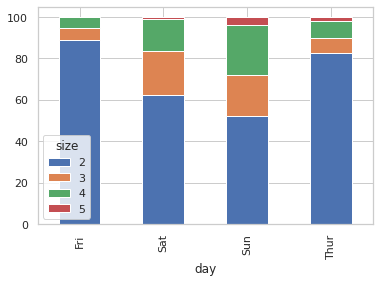

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)*100
party_pcts
party_pcts.plot.bar(stacked =True)

In [ ]:
plt.close('all')

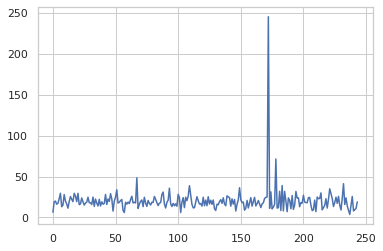

In [ ]:
tips['tip_pct'] = (tips['tip'] / (tips['total_bill'] - tips['tip']))*100
tips.head()
tips['tip_pct'].plot()


In [ ]:
plt.close('all')

<h2> Seaborn with Pandas: </h2>
Import seaborn as sns: seaborn is an extension of matplotlib and provides some nice additional functionality. Take our previous example: seaborn now adds error bars

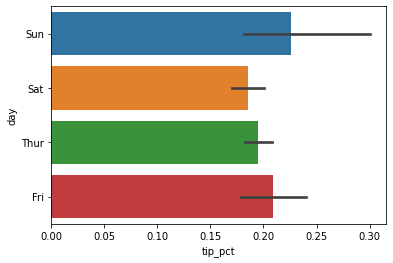

In [ ]:
import seaborn as sns
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

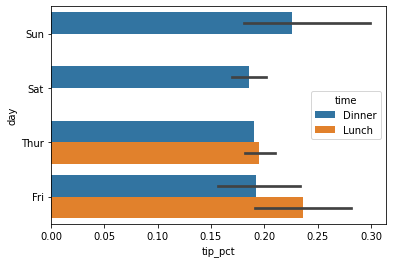

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.set(style="whitegrid")

### Histograms and Density Plots

Histograms are density visualizations that group data into user-specified bins. Using plot.hist() on a series, we can specify how tightly we want the data grouped with bins = __. 

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

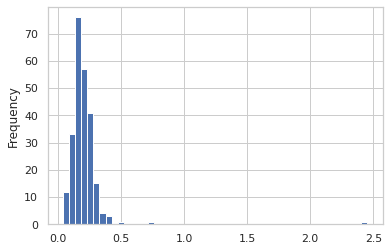

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

A density curve is the outline of a histogram plot.

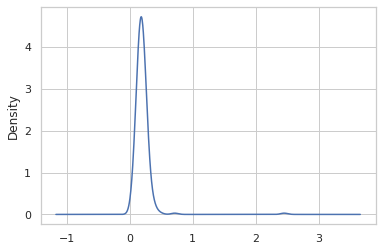

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Seaborn uses distplot() for a combined histogram and density curve:

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Scatter-plots scatter an X and Y series across a graph so we can see the correlation of the two sets. In regular matplotlib, we use plot.scatter(x,y):

In [ ]:
trans_data.plot.scatter('m1', 'unemp')

But in seaborn regplot() we can see additional functionality like a line of best fit and a variance zone:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

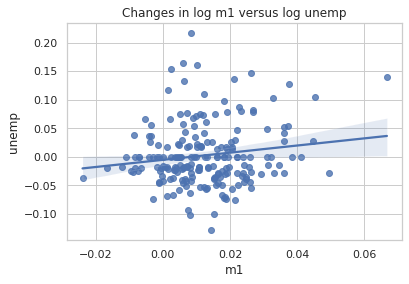

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<h2> Exercise </h2> :
Using the class heights file from last class: <br>
1) Plot the heights in cm as a line plot in matplotlib <br>
2) Plot the average height of males against females in the class using a scatterplot in either seaborn or matplotlib<br>
3) Create a separate column in the data frame to hold the difference from the mean height. Plot the difference from the mean against the heights on the same plot. <br> 

Solution:

In [ ]:
import math
from statistics import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class_heights = pd.read_csv('class_heights.txt',delimiter='|')
# 1) Clean the data
# 2) Make column names Title Case 
class_heights['Gender'] = class_heights['gender'].str.title()
class_heights['Height'] = class_heights['height'].str.title()
class_heights['Gender'] = class_heights['Gender'].astype('string')
del class_heights['gender']
del class_heights ['height']

# 3) Sort gender column by Gender. Female first
class_heights['Gender'] = sorted(class_heights['Gender'],reverse=False)

# 4) Convert heights to centimeters
class_heights['Height_CM'] = class_heights['Height'].map(lambda x: x.replace("'",""))
class_heights['Height_CM'] = [(float(i[0])*30.48) + (float(i[1])*2.54) for i in class_heights['Height_CM']]

# 5) Count how many of each gender are in the total class_heights
num_male = len([ x for x in class_heights['Gender'] if x == 'Male' ]) 
num_female = len(class_heights['Gender']) - num_male

# 6) Calc the average height of each gender and the class total



# 7) Calc the mean, median, mode, and standard deviantion for the total class

class_heights['Height_CM'].plot()
class_heights
